# Gradient Descent utilizando sklearn
Exemplo para obter o custo por iteração

Author: H3dema

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.exceptions import ConvergenceWarning
import warnings

%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (16, 9)

In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Dataset

- criado aleatoriamente utilizado make_regression

In [4]:
# gera uma conjunto de dados (aprox. reta) aleatoriamente
n = 150  # numero de pontos (exemplos)
m = 4  # numero de características

x_values, y_values = make_regression(n_samples=n, 
                                     n_features=m, 
                                     random_state=0, 
                                     bias=10,
                                     noise=30,
                                     coef=False)

## criando o regressor

Opções de loss: {'huber', 'squared_epsilon_insensitive', 'squared_error', 'epsilon_insensitive'}

In [5]:
max_iter = 200  # número máximo de iterações

custo = []
for i in range(1,max_iter):
    clf = linear_model.SGDRegressor(max_iter=i,
                                    loss='squared_error')
    clf.fit(x_values, y_values)
    erro = clf.predict(x_values)-y_values
    erro_m = np.mean(erro**2)/2/n
    r2 = clf.score(x_values, y_values)
    custo.append((erro_m, r2))
custo = np.asarray(custo)

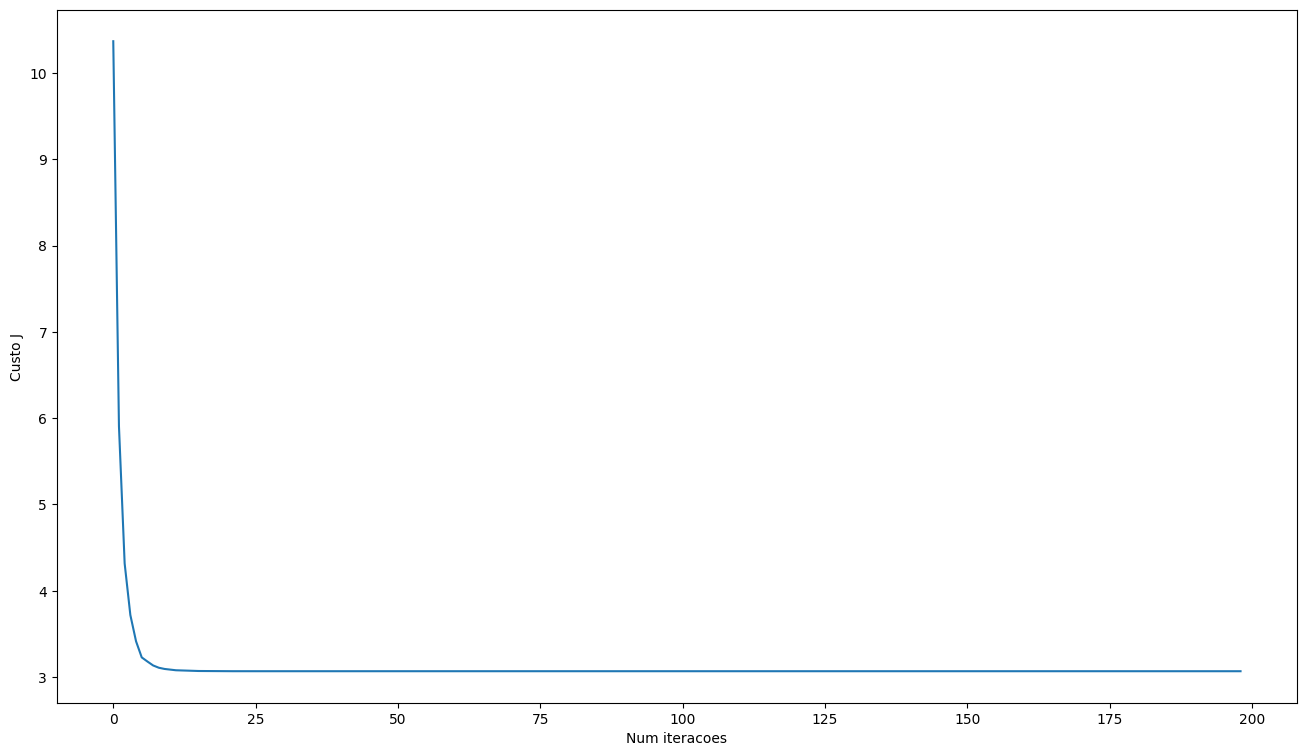

In [6]:
x = np.asarray(range(max_iter-1))
plt.plot(x, custo[:,0], label="J")
plt.xlabel("Num iteracoes")
plt.ylabel("Custo J")
plt.show()

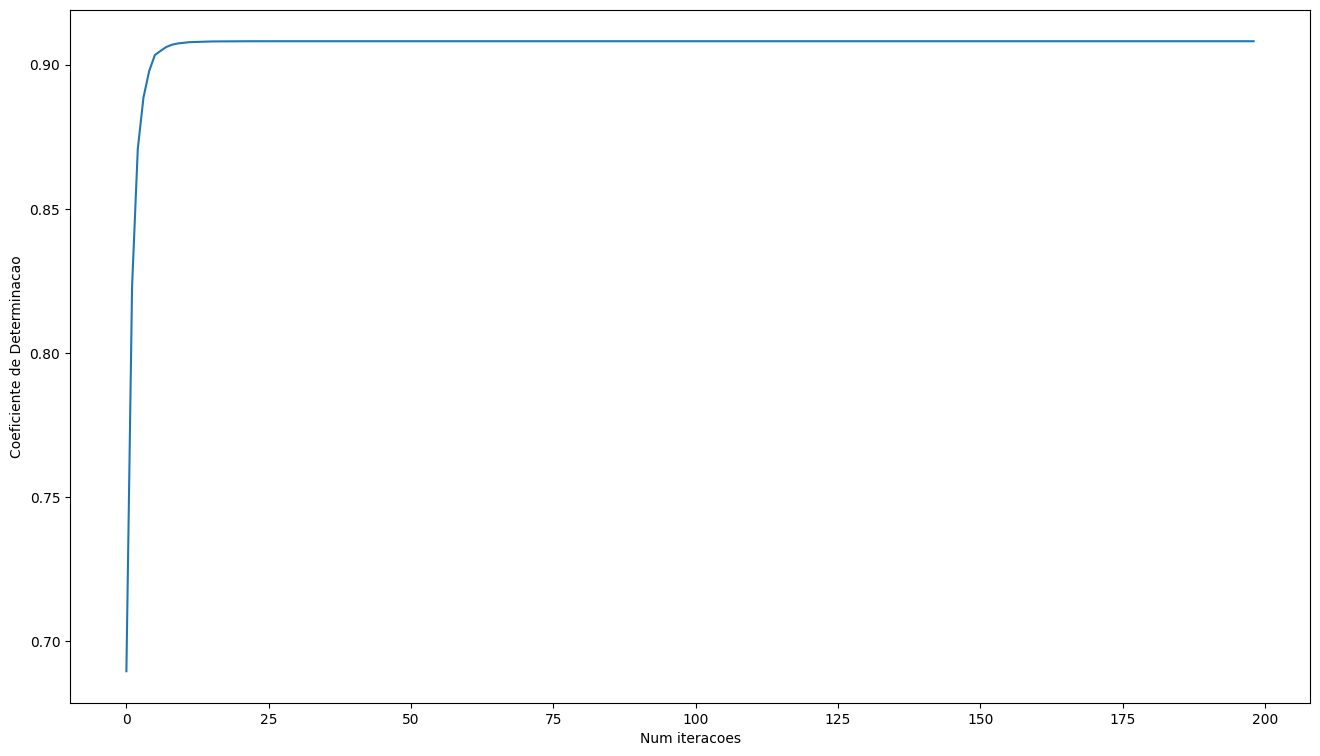

In [7]:
plt.plot(x, custo[:,1], label="J")
plt.xlabel("Num iteracoes")
plt.ylabel("Coeficiente de Determinacao")
plt.show()

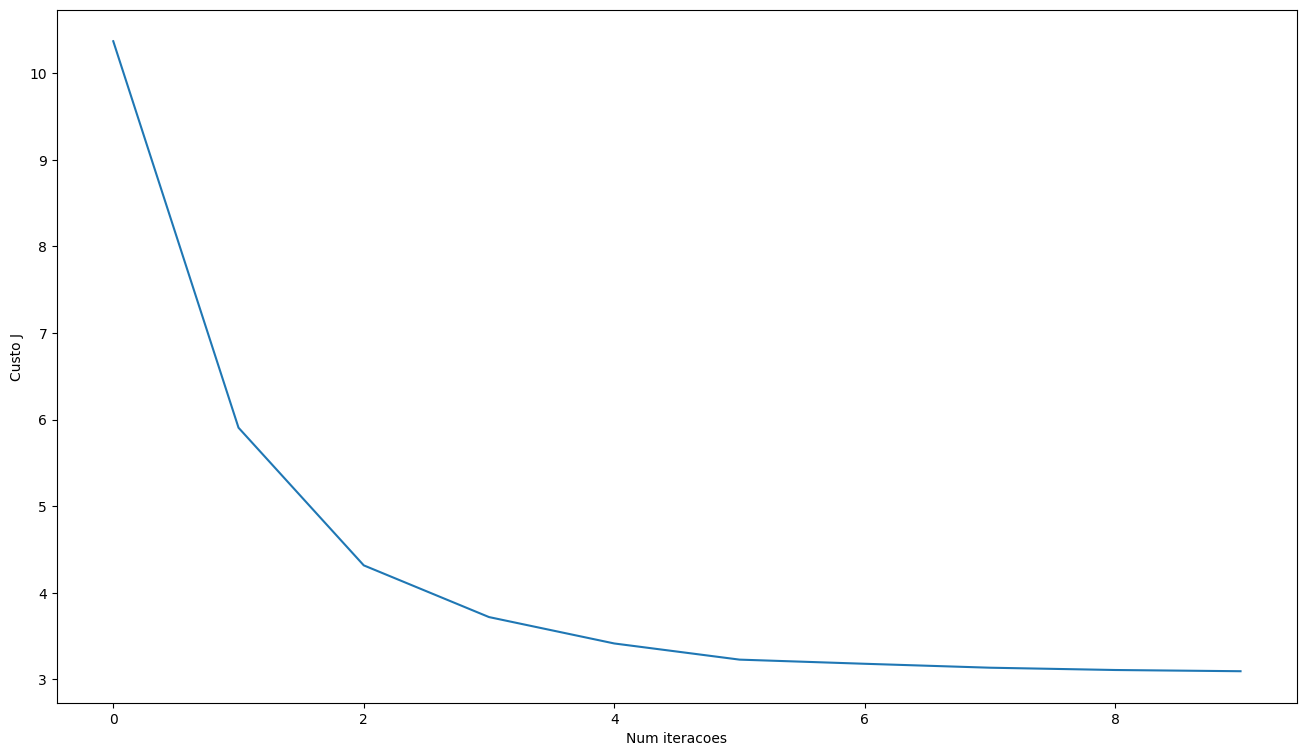

In [8]:
plt.plot(x[:10], custo[:10,0], label="J")
plt.xlabel("Num iteracoes")
plt.ylabel("Custo J")
plt.show()